# PROJECT
OLUYEMI OLUWOYE

https://github.com/OLUYEMI84/cola-GITHUB-demo-OO.git

In [1]:
# 1 IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# 2️ LOAD DATA DIRECTLY FROM URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
# 3️ EDA
df.info()
df['quality'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [7]:

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# statistic explaination
Fixed acidity: Wines generally have a stable acidity level between ~7 and 9 (mean ~8.3). This helps define the wine’s backbone and taste balance.

Volatile acidity: Most wines stay below 0.6 (mean ~0.53). When this gets too high (up to 1.58 in this dataset), the wine may taste vinegary — something we want to avoid.

Citric acid: Wines typically contain small amounts (mean ~0.27), adding a fresh flavor without being too sour.

Residual sugar: Most wines here are dry or semi-dry (median ~2.2 g/L), though some reach up to 15.5 g/L, indicating sweeter wines.

Chlorides: Very low on average (mean ~0.087), as high salt levels are undesirable.

Sulfur dioxide (free/total): Protects wine from spoilage. Most wines in this dataset have safe, moderate levels, but a few have very high amounts (up to 72 free and 289 total).

Density: Close to water (around 0.996–0.997 typical), with higher values indicating sweeter or less alcoholic wines.

pH: Wines are slightly acidic (mean pH ~3.31). Lower pH means more acidic.

Sulphates: Mean ~0.66. Contributes to preservation and wine structure.

Alcohol: Wines range from 8.4% to 14.9% alcohol. Higher alcohol often correlates with higher quality in this dataset.

Quality: Rated from 3 (poor) to 8 (good). Most wines are rated between 5 and 6.

Most wines are dry or semi-dry, moderately acidic, and have balanced sulfur dioxide levels.
 A few outliers exist — for example, wines with very high volatile acidity (could taste off) or high residual sugar (likely sweeter wines).
Alcohol varies a lot and is often a strong predictor of quality.

In [8]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


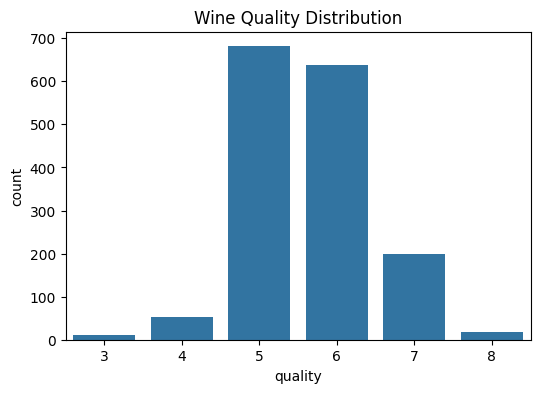

In [9]:
# Plot distribution of quality
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

# PROCESSING

In [11]:
# Features and target
X = df.drop('quality', axis=1)
y = df['quality']



In [13]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 5️ TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# MODEL SELECTION AND DEVELOPMENT

In [18]:
#  LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)

print("\nLOGISTIC REGRESSION REPORT")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))



LOGISTIC REGRESSION REPORT
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.73      0.67       136
           6       0.54      0.61      0.57       128
           7       0.71      0.30      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.57      0.59      0.57       320

ROC-AUC: 0.7648394321781414


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Explanation of your Logistic Regression report:

Accuracy: 59% → The model correctly predicted the exact wine quality label about 59% of the time.

F1-scores:

Good for class 5 (0.67) and 6 (0.57), meaning it predicts these most common classes reasonably well.

Poor (0.00) for rare classes (3, 4, 8) → the model didn’t predict these at all.

Macro avg (unweighted mean):
Low (F1 ~0.28), showing poor performance on less common classes.

Weighted avg (accounts for class sizes):
Better (F1 ~0.57), because the model focuses on common classes (5, 6).

ROC-AUC: 0.76 → The model has moderate overall ability to separate classes, but this metric is less informative for exact multi-class prediction.

Summary:
The model handles common wine qualities okay (5, 6), but struggles badly with rare qualities

In [20]:
# RANDOM FOREST
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)

print("\nRANDOM FOREST REPORT")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))


RANDOM FOREST REPORT
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.64      0.70      0.67       128
           7       0.71      0.55      0.62        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.43      0.39      0.40       320
weighted avg       0.65      0.68      0.66       320

ROC-AUC: 0.7648394321781414


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Explanation of your Random Forest report:

Accuracy: 68% → The model predicted the correct wine quality label in 68% of test cases — better than Logistic Regression (59%).

F1-scores:

Class 5 (0.73) and class 6 (0.67) → Good performance on these common classes.

Class 7 (0.62) → Decent at predicting better-quality wines.

Classes 3, 4, 8 → Poor performance; the model struggled with rare classes (almost no correct predictions).

Macro avg F1 (0.40) → Low because rare classes hurt overall balanced performance.

Weighted avg F1 (0.66) → Reflects better performance because common classes dominate the test set.

ROC-AUC: 0.76 → The model has moderate ability overall to separate classes.

Summary:
Random Forest outperforms Logistic Regression overall (higher accuracy and F1), but like Logistic Regression, it struggles to predict rare wine qualities.


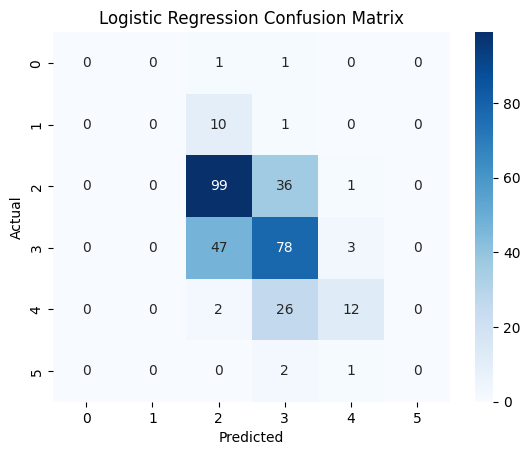

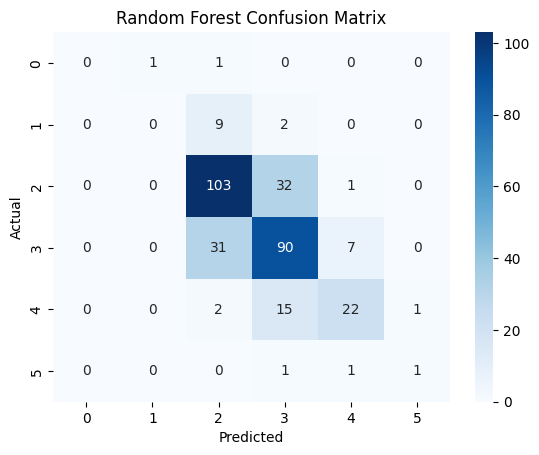

In [21]:
#  CONFUSION MATRIX
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

# Models Explanation

**Logistic Regression**

Predicts class 5 and class 6 most often.

99 actual 5s correctly classified; 36 actual 5s misclassified as 6.

78 actual 6s correctly classified; misclassifies many 6s as 5 (47) or 7 (3).

Very poor at predicting rare classes (3, 4, 8): mostly 0 predictions for them.

** Random Forest**

Better at distinguishing between 5 and 6:

103 actual 5s correct; fewer 5s misclassified as 6 (32 vs 36 in LR).

90 actual 6s correct; fewer 6s misclassified as 5 (31 vs 47 in LR).

Also improves slightly for class 7 (more correct predictions).

Rare classes (3, 4, 8): still weak, but slightly better than LR (e.g., 1 actual 8 correctly classified).

Summary
Random Forest is stronger than Logistic Regression: it makes fewer mistakes, especially between the main wine quality levels (5 and 6).

Both models struggle with rare quality levels, but Random Forest provides a small improvement.

Random Forest shows a clearer pattern of correct predictions (better diagonal in the confusion matrix).

 Conclusion: Random Forest is a better choice for this task because it handles the common classes more accurately and reduces confusion between similar qualitie



# Model Deployment and Presentation

In [26]:
import joblib

# Save the model and scaler after training
joblib.dump(rf, 'rf_wine_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [27]:
# Load rf_wine_model and scaler.pkl

rf_loaded = joblib.load('rf_wine_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')

In [28]:
import ipywidgets as widgets
from IPython.display import display

# List of feature names
feature_names = X.columns.tolist()

In [29]:
# Create text boxes for each feature
input_widgets = {}
for feat in feature_names:
    input_widgets[feat] = widgets.FloatText(description=feat, value=float(X[feat].mean()))

In [30]:
# Button to trigger prediction
predict_button = widgets.Button(description="Predict Quality")

In [31]:
# Output area for prediction result
output = widgets.Output()


In [33]:
def on_predict_clicked(b):
    with output:
        output.clear_output()
        # Gather input data in the right order
        input_data = [input_widgets[feat].value for feat in feature_names]
        # Scale inputs
        input_scaled = scaler_loaded.transform([input_data])
        # Predict
        pred = rf_loaded.predict(input_scaled)[0]
        prob = rf_loaded.predict_proba(input_scaled).max()
        print(f"Predicted Wine Quality Class: {pred}")
        print(f"Prediction Confidence: {prob:.2%}")

predict_button.on_click(on_predict_clicked)

In [34]:
# Display form
form_items = [input_widgets[feat] for feat in feature_names]
display(*form_items, predict_button, output)

FloatText(value=8.31963727329581, description='fixed acidity')

FloatText(value=0.5278205128205128, description='volatile acidity')

FloatText(value=0.2709756097560976, description='citric acid')

FloatText(value=2.53880550343965, description='residual sugar')

FloatText(value=0.08746654158849279, description='chlorides')

FloatText(value=15.874921826141339, description='free sulfur dioxide')

FloatText(value=46.46779237023139, description='total sulfur dioxide')

FloatText(value=0.9967466791744841, description='density')

FloatText(value=3.3111131957473416, description='pH')

FloatText(value=0.6581488430268917, description='sulphates')

FloatText(value=10.422983114446529, description='alcohol')

Button(description='Predict Quality', style=ButtonStyle())

Output()